In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings 
from matplotlib import pyplot as plt
from sklearn import model_selection, preprocessing, ensemble, metrics

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,6)

**Importing the dataset**

In [19]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
df['Gender'] = df.Gender.map({'Female':0, 'Male':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [21]:
X,y = df.drop(columns=['User ID','Purchased']), df['Purchased']

# Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=27, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape
((320, 3), (80, 3))

((320, 3), (80, 3))

**Feature Scaling**

In [22]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

**Fitting Random Forest to the Training set**

In [23]:
rf = ensemble.RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

y_pred = rf.predict(X_test)

**Predicting the Test set results**

In [24]:
print("Training score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test score: {:.2f}".format(rf.score(X_test, y_test)))
print("Accuracy score: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Training score: 1.00
Test score: 0.90
Accuracy score: 0.90


**Making the Confusion Matrix**

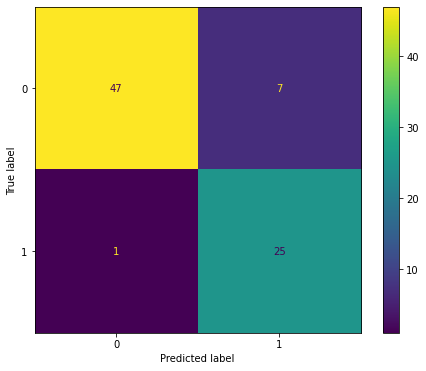

In [25]:
metrics.plot_confusion_matrix(rf, X_test, y_test);

**Visualising the Training set results**

In [26]:
print("Training score: {:.2f}".format(rf.score(X_train, y_train)))

Training score: 1.00


**Visualising the Test set results**

In [27]:
print("Test score: {:.2f}".format(rf.score(X_test, y_test)))

Test score: 0.90


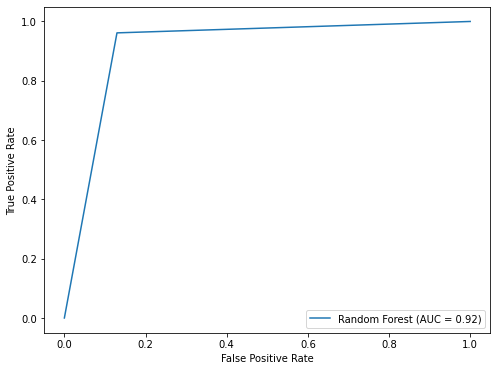

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot();